In [ ]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

# 仅指定任务时，使用默认模型（不推荐）
pipe = pipeline("sentiment-analysis")
pipe("今儿上海可真冷啊")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.8957217335700989}]

In [ ]:
pipe("我觉得这家店蒜泥白肉的味道一般")

[{'label': 'NEGATIVE', 'score': 0.9238731265068054}]

In [ ]:
# 默认使用的模型 distilbert-base-uncased-finetuned-sst-2-english
# 并未针对中文做太多训练，中文的文本分类任务表现未必满意
pipe("你学东西真的好快，理论课一讲就明白了")

[{'label': 'NEGATIVE', 'score': 0.8578692674636841}]

In [ ]:
# 替换为英文后，文本分类任务的表现立刻改善
pipe("You learn things really quickly. You understand the theory class as soon as it is taught.")

[{'label': 'POSITIVE', 'score': 0.9961802959442139}]

In [ ]:
pipe("Today Shanghai is really cold.")

[{'label': 'NEGATIVE', 'score': 0.9995032548904419}]

批处理调用模型推理

In [ ]:
text_list = [
    "Today Shanghai is really cold.",
    "I think the taste of the garlic mashed pork in this store is average.",
    "You learn things really quickly. You understand the theory class as soon as it is taught."
]

pipe(text_list)

[{'label': 'NEGATIVE', 'score': 0.9995032548904419},
 {'label': 'NEGATIVE', 'score': 0.9984821677207947},
 {'label': 'POSITIVE', 'score': 0.9961802959442139}]

使用 Pipeline API 调用更多预定义任务

Natural Language Processing(NLP)

In [ ]:
from transformers import pipeline

classifier = pipeline(task="ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [ ]:
preds = classifier("Hugging Face is a French company based in New York City.")
preds = [
    {
        "entity": pred["entity"],
        "score": round(pred["score"], 4),
        "index": pred["index"],
        "word": pred["word"],
        "start": pred["start"],
        "end": pred["end"],
    }
    for pred in preds
]
print(*preds, sep="\n")

{'entity': 'I-ORG', 'score': 0.9968, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}
{'entity': 'I-ORG', 'score': 0.9293, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}
{'entity': 'I-ORG', 'score': 0.9763, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}
{'entity': 'I-MISC', 'score': 0.9983, 'index': 6, 'word': 'French', 'start': 18, 'end': 24}
{'entity': 'I-LOC', 'score': 0.999, 'index': 10, 'word': 'New', 'start': 42, 'end': 45}
{'entity': 'I-LOC', 'score': 0.9987, 'index': 11, 'word': 'York', 'start': 46, 'end': 50}
{'entity': 'I-LOC', 'score': 0.9992, 'index': 12, 'word': 'City', 'start': 51, 'end': 55}


合并实体

In [ ]:
classifier = pipeline(task="ner", grouped_entities=True)
classifier("Hugging Face is a French company based in New York City.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

[{'entity_group': 'ORG',
  'score': 0.9674637,
  'word': 'Hugging Face',
  'start': 0,
  'end': 12},
 {'entity_group': 'MISC',
  'score': 0.99828726,
  'word': 'French',
  'start': 18,
  'end': 24},
 {'entity_group': 'LOC',
  'score': 0.99896103,
  'word': 'New York City',
  'start': 42,
  'end': 55}]

Question Answering

In [ ]:
from transformers import pipeline

question_answerer = pipeline(task="question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
preds = question_answerer(
    question="What is the name of the repository?",
    context="The name of the repository is huggingface/transformers",
)
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, answer: {preds['answer']}"
)

score: 0.9327, start: 30, end: 54, answer: huggingface/transformers


In [ ]:
preds = question_answerer(
    question="What is the capital of China?",
    context="On 1 October 1949, CCP Chairman Mao Zedong formally proclaimed the People's Republic of China in Tiananmen Square, Beijing.",
)
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, answer: {preds['answer']}"
)

score: 0.9458, start: 115, end: 122, answer: Beijing


Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline(task="summarization",
                      model="t5-base",
                      min_length=8,
                      max_length=32,
)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
summarizer(
    """
    In this work, we presented the Transformer, the first sequence transduction model based entirely on attention,
    replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention.
    For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers.
    On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art.
    In the former task our best model outperforms even all previously reported ensembles.
    """
)

[{'summary_text': 'the Transformer is the first sequence transduction model based entirely on attention . it replaces recurrent layers commonly used in encoder-decode'}]

In [ ]:
summarizer(
    '''
    Large language models (LLM) are very large deep learning models that are pre-trained on vast amounts of data.
    The underlying transformer is a set of neural networks that consist of an encoder and a decoder with self-attention capabilities.
    The encoder and decoder extract meanings from a sequence of text and understand the relationships between words and phrases in it.
    Transformer LLMs are capable of unsupervised training, although a more precise explanation is that transformers perform self-learning.
    It is through this process that transformers learn to understand basic grammar, languages, and knowledge.
    Unlike earlier recurrent neural networks (RNN) that sequentially process inputs, transformers process entire sequences in parallel.
    This allows the data scientists to use GPUs for training transformer-based LLMs, significantly reducing the training time.
    '''
)

[{'summary_text': 'large language models (LLMs) are very large deep learning models pre-trained on vast amounts of data . transformers are capable of un'}]

Audio 音频处理任务

In [ ]:
!pip install ffmpeg
!pip install ffmpeg ffmpeg-python

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6080 sha256=0ce2537adfff0ee1f3ba0376836d024cfc2ad36be13aac6658f23b843ce915d2
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from transformers import pipeline

classifier = pipeline(task="audio-classification", model="superb/hubert-base-superb-er")

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-base-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-base-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'hubert.encoder.pos_conv_embed.conv.parametriza

preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [ ]:
# 使用 Hugging Face Datasets 上的测试文件
preds = classifier("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

[{'score': 0.4532, 'label': 'hap'},
 {'score': 0.3622, 'label': 'sad'},
 {'score': 0.0943, 'label': 'neu'},
 {'score': 0.0903, 'label': 'ang'}]

Automatic speech recognition（ASR）


In [ ]:
from transformers import pipeline

# 使用 `model` 参数指定模型
transcriber = pipeline(task="automatic-speech-recognition", model="openai/whisper-small")

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
text = transcriber("/content/drive/MyDrive/data/audio/mlk.flac")
text

{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

Computer Vision 计算机视觉


Image Classificaiton

模型主页：https://huggingface.co/google/vit-base-patch16-224

In [ ]:
from transformers import pipeline

classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4335, 'label': 'lynx, catamount'}
{'score': 0.0348, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0239, 'label': 'Egyptian cat'}
{'score': 0.0229, 'label': 'tiger cat'}


In [ ]:
# 使用本地图片（狼猫）
preds = classifier(
    "/content/drive/MyDrive/data/image/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4335, 'label': 'lynx, catamount'}
{'score': 0.0348, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0239, 'label': 'Egyptian cat'}
{'score': 0.0229, 'label': 'tiger cat'}


In [ ]:
# 使用本地图片（熊猫）
preds = classifier(
    "/content/drive/MyDrive/data/image/panda.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.9962, 'label': 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'}
{'score': 0.0018, 'label': 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens'}
{'score': 0.0002, 'label': 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'}
{'score': 0.0001, 'label': 'sloth bear, Melursus ursinus, Ursus ursinus'}
{'score': 0.0001, 'label': 'brown bear, bruin, Ursus arctos'}


Object Detection
与图像分类不同，目标检测在图像中识别多个对象以及这些对象在图像中的位置（由边界框定义）。目标检测的一些示例应用包括：

自动驾驶车辆：检测日常交通对象，如其他车辆、行人和红绿灯
遥感：灾害监测、城市规划和天气预报
缺陷检测：检测建筑物中的裂缝或结构损坏，以及制造业产品缺陷
模型主页：https://huggingface.co/facebook/detr-resnet-50

In [ ]:
!pip install timm

In [ ]:
from transformers import pipeline

detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9864,
  'label': 'cat',
  'box': {'xmin': 178, 'ymin': 154, 'xmax': 882, 'ymax': 598}}]

In [ ]:
preds = detector(
    "/content/drive/MyDrive/data/image/cat_dog.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9985,
  'label': 'cat',
  'box': {'xmin': 78, 'ymin': 57, 'xmax': 309, 'ymax': 371}},
 {'score': 0.989,
  'label': 'dog',
  'box': {'xmin': 279, 'ymin': 20, 'xmax': 482, 'ymax': 416}}]

Homework：替换以上示例中的模型，对比不同模型在相同任务上的性能表现
在 Hugging Face Models 中找到适合你的模型：https://huggingface.co/models

ProsusAI/finbert

In [ ]:
from transformers import pipeline

# 仅指定任务时 使用模型 ProsusAI/finbert
pipe = pipeline("sentiment-analysis", model="ProsusAI/finbert")
pipe("今儿上海可真冷啊")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'neutral', 'score': 0.9097682237625122}]

In [ ]:
pipe("我觉得这家店蒜泥白肉的味道一般")

[{'label': 'neutral', 'score': 0.9018570184707642}]

In [ ]:
# 使用模型 ProsusAI/finbert
pipe("你学东西真的好快，理论课一讲就明白了")

[{'label': 'neutral', 'score': 0.8864694237709045}]

cardiffnlp/twitter-roberta-base-sentiment-latest


In [ ]:
# 仅指定任务时 使用模型 cardiffnlp/twitter-roberta-base-sentiment-latest
pipe = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
pipe("今儿上海可真冷啊")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'neutral', 'score': 0.7541275024414062}]

In [ ]:
pipe("我觉得这家店蒜泥白肉的味道一般")

[{'label': 'neutral', 'score': 0.7896565794944763}]

In [ ]:
pipe("你学东西真的好快，理论课一讲就明白了")

[{'label': 'neutral', 'score': 0.7751216292381287}]

Image Classificaiton

microsoft/resnet-50

In [ ]:
from transformers import pipeline

classifier = pipeline(task="image-classification", model="microsoft/resnet-50")

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/103M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# 使用本地图片（狼猫）
preds = classifier(
    "/content/drive/MyDrive/data/image/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.5874, 'label': 'lynx, catamount'}
{'score': 0.1289, 'label': 'tabby, tabby cat'}
{'score': 0.075, 'label': 'marmot'}
{'score': 0.0382, 'label': 'badger'}
{'score': 0.0131, 'label': 'Egyptian cat'}


In [ ]:
# 使用本地图片（熊猫）
preds = classifier(
    "/content/drive/MyDrive/data/image/panda.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.9768, 'label': 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'}
{'score': 0.0088, 'label': 'indri, indris, Indri indri, Indri brevicaudatus'}
{'score': 0.0004, 'label': 'groenendael'}
{'score': 0.0003, 'label': 'Siberian husky'}
{'score': 0.0002, 'label': 'malamute, malemute, Alaskan malamute'}


Object Detection 与图像分类不同，目标检测在图像中识别多个对象以及这些对象在图像中的位置（由边界框定义）。目标检测的一些示例应用包括：

自动驾驶车辆：检测日常交通对象，如其他车辆、行人和红绿灯 遥感：灾害监测、城市规划和天气预报 缺陷检测：检测建筑物中的裂缝或结构损坏，以及制造业产品缺陷 模型主页：https://huggingface.co/facebook/detr-resnet-50

In [ ]:
!pip install timm

microsoft/table-transformer-structure-recognition

In [ ]:
from transformers import pipeline

detector = pipeline(task="object-detection", model="microsoft/table-transformer-structure-recognition")

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9902,
  'label': 'table',
  'box': {'xmin': 67, 'ymin': 55, 'xmax': 880, 'ymax': 592}}]

In [ ]:
preds = detector(
    "https://djl.ai/examples/src/test/resources/dog_bike_car.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9819,
  'label': 'table',
  'box': {'xmin': 37, 'ymin': 40, 'xmax': 723, 'ymax': 525}}]

facebook/detr-resnet-**50** **bold text**

In [ ]:
from transformers import pipeline

detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

In [ ]:
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9864,
  'label': 'cat',
  'box': {'xmin': 178, 'ymin': 154, 'xmax': 882, 'ymax': 598}}]

In [ ]:
preds = detector(
    "https://djl.ai/examples/src/test/resources/dog_bike_car.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.9994,
  'label': 'dog',
  'box': {'xmin': 131, 'ymin': 221, 'xmax': 309, 'ymax': 536}},
 {'score': 0.9988,
  'label': 'bicycle',
  'box': {'xmin': 124, 'ymin': 128, 'xmax': 565, 'ymax': 421}},
 {'score': 0.9768,
  'label': 'truck',
  'box': {'xmin': 469, 'ymin': 76, 'xmax': 680, 'ymax': 166}},
 {'score': 0.9102,
  'label': 'car',
  'box': {'xmin': 471, 'ymin': 77, 'xmax': 679, 'ymax': 165}}]

In [ ]:
preds = detector(
    "https://production-media.paperswithcode.com/datasets/waymo.jpg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

[{'score': 0.968,
  'label': 'car',
  'box': {'xmin': 280, 'ymin': 339, 'xmax': 315, 'ymax': 376}},
 {'score': 0.9879,
  'label': 'person',
  'box': {'xmin': 211, 'ymin': 353, 'xmax': 235, 'ymax': 413}},
 {'score': 0.9104,
  'label': 'car',
  'box': {'xmin': 495, 'ymin': 334, 'xmax': 540, 'ymax': 368}},
 {'score': 0.9022,
  'label': 'car',
  'box': {'xmin': 481, 'ymin': 313, 'xmax': 515, 'ymax': 340}},
 {'score': 0.9436,
  'label': 'car',
  'box': {'xmin': 488, 'ymin': 326, 'xmax': 526, 'ymax': 358}},
 {'score': 0.9127,
  'label': 'car',
  'box': {'xmin': 291, 'ymin': 320, 'xmax': 340, 'ymax': 362}},
 {'score': 0.968,
  'label': 'truck',
  'box': {'xmin': 290, 'ymin': 320, 'xmax': 340, 'ymax': 364}},
 {'score': 0.9815,
  'label': 'truck',
  'box': {'xmin': 381, 'ymin': 303, 'xmax': 411, 'ymax': 336}},
 {'score': 0.9794,
  'label': 'person',
  'box': {'xmin': 114, 'ymin': 348, 'xmax': 138, 'ymax': 413}},
 {'score': 0.9331,
  'label': 'car',
  'box': {'xmin': 336, 'ymin': 317, 'xmax': 35

In [2]:
!pip install diffusers
!pip install xformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.3 MB/s eta 0:00:00


Stable diffusion AI 绘画


In [1]:
import torch
from diffusers import DiffusionPipeline
from xformers.ops import MemoryEfficientAttentionFlashAttentionOp

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention(attention_op=MemoryEfficientAttentionFlashAttentionOp)
# Workaround for not accepting attention shape using VAE for Flash Attention
pipe.vae.enable_xformers_memory_efficient_attention(attention_op=None)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
prompt = "a photo of an astronaut riding a horse on mars"
pipe.enable_attention_slicing()
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

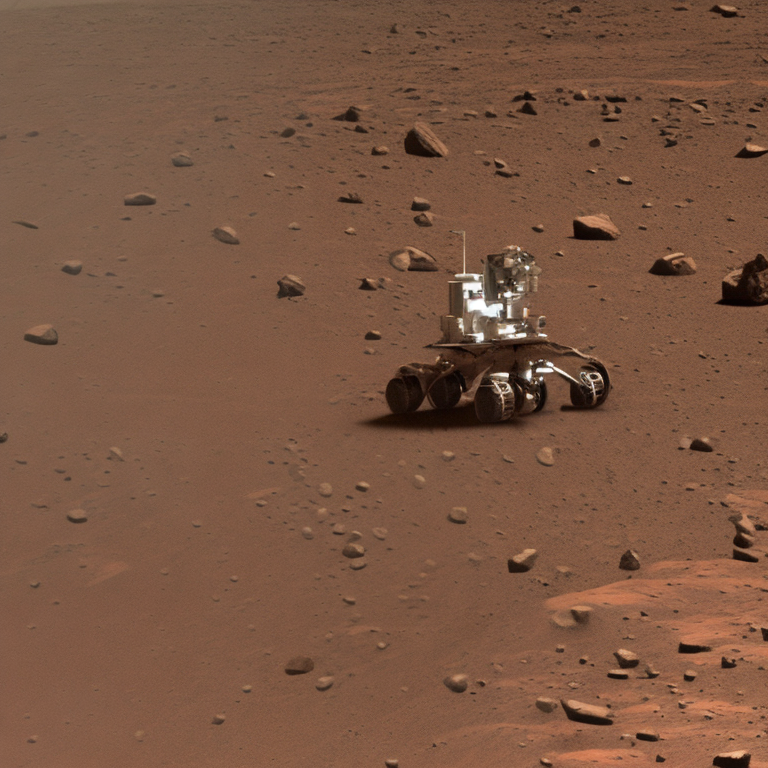

In [3]:
image

In [4]:
prompt = "a happy dog and a happy cat"
pipe.enable_attention_slicing()
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

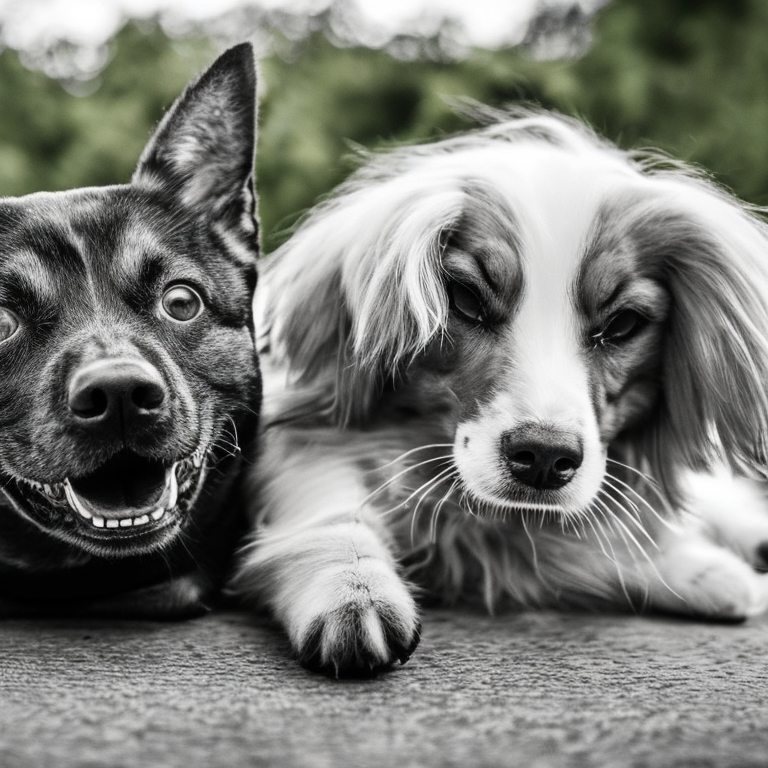

In [5]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

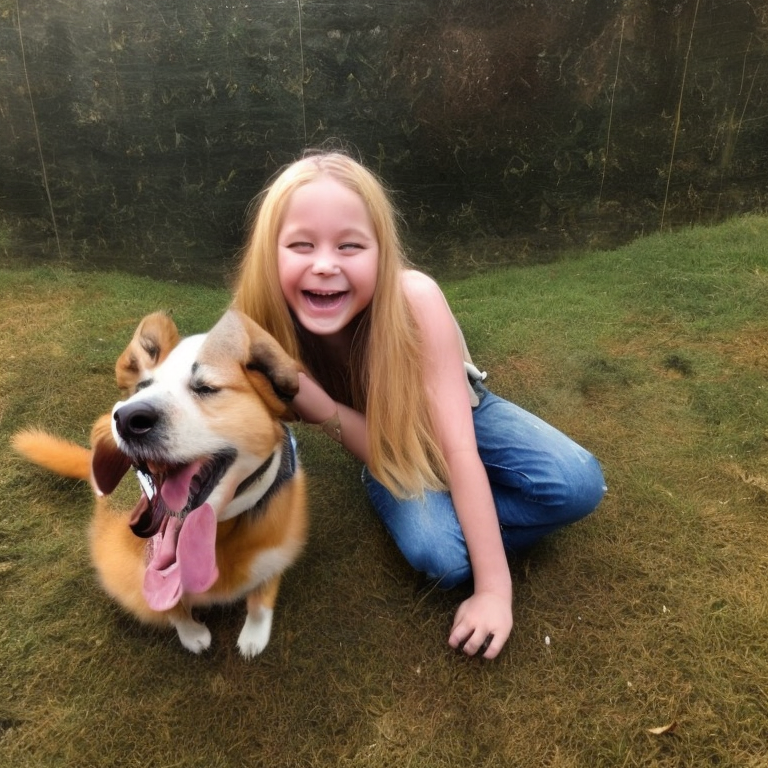

In [6]:
prompt = "a happy dog and a cute girl"
pipe.enable_attention_slicing()
image = pipe(prompt).images[0]
image